In [2]:
using DataFrames
Pkg.status("DataFrames")

 - DataFrames                    0.10.1


In [3]:
using PyPlot
Pkg.status("PyPlot")

 - PyPlot                        2.3.2


In [36]:
function sim(n; mult = 1.3)
    n_half = round(Int,n/2);
    srand(1);
    x = [randn(n_half);3*randn(n-n_half)]; s = ones(n);
    out = ash(x,s, lowrank = "qr")[5];
    return out
end

t = sim(1000); # check if works well

n = 40000 * 4.^(1:3);
for i = 1:3
    t = [t sim(n[i])];
end
t = t[:,2:end]';

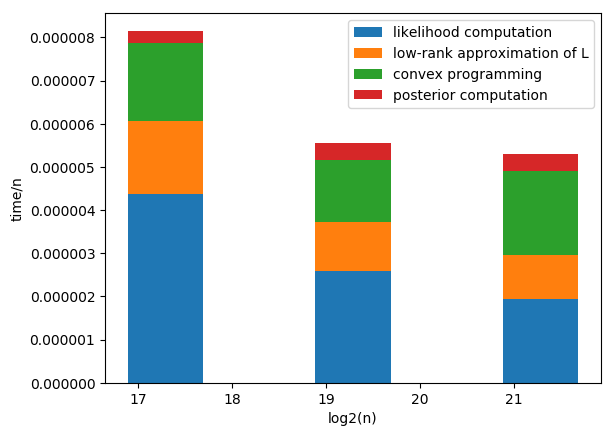

PyObject <matplotlib.legend.Legend object at 0x14e44c510>

In [51]:
fig, ax = subplots()
ax[:bar](log2.(n),t[:,1]./n)
ax[:bar](log2.(n),t[:,2]./n, bottom = t[:,1]./n)
ax[:bar](log2.(n),t[:,3]./n, bottom = sum(t[:,1:2],2)[:]./n)
ax[:bar](log2.(n),t[:,4]./n, bottom = sum(t[:,1:3],2)[:]./n)
xlabel("log2(n)")
ylabel("time/n")
ax[:legend](["likelihood computation";"low-rank approximation of L";"convex programming";"posterior computation"])

# they are in the same scale (time per n).
# For smaller n, other issues (e.g. memory allocation) take considerable amount of time.